# Linear models: Categorical predictors, and Multiple regression

In [1]:
# Load standard libraries for data analysis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# packages for statistics
import scipy.stats as stats

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from utils import Linear_Reg_Diagnostic

df = pd.read_csv('../data/boston_precip_temp.csv')
df.head()


,station,name,date,temp,diurnal_temp_range,precip-total,snow-totals
0,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",1,25.9,19.7,3.43,NaN
1,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",2,28.9,21.0,3.25,NaN
2,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",3,36.4,21.5,4.45,NaN
3,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",4,46.8,22.7,4.19,NaN
4,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",5,56.4,24.9,3.68,NaN


## Review from last time

In [2]:
df_sub = df.loc[(df['snow-totals']>0) & (df['snow-totals'].notnull()) & (df['temp'].notnull()),:].reset_index(drop=True)
df_sub = df_sub.rename(columns={'precip-total':'precip_total','snow-totals':'snow_total'})

df_sub.shape

(82, 7)

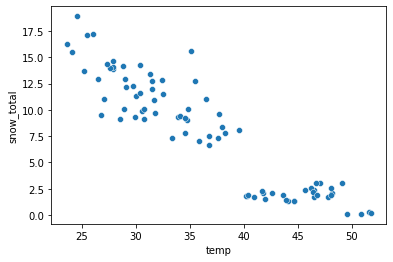

In [3]:
sns.scatterplot(data=df_sub, x='temp', y='snow_total' )
plt.show()

In [4]:
df_sub.corr()

,date,temp,diurnal_temp_range,precip_total,snow_total
date,1.000000,0.354837,-0.177822,0.322120,-0.467552
temp,0.354837,1.000000,0.213018,0.485798,-0.919683
diurnal_temp_range,-0.177822,0.213018,1.000000,0.117884,-0.206205
precip_total,0.322120,0.485798,0.117884,1.000000,-0.338424
snow_total,-0.467552,-0.919683,-0.206205,-0.338424,1.000000


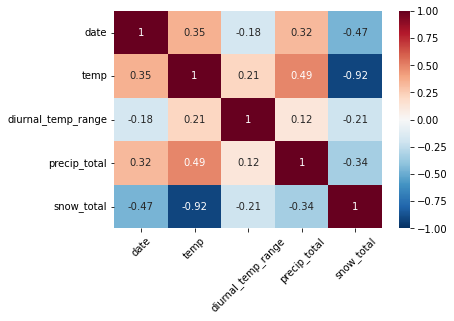

In [5]:
sns.heatmap(df_sub.corr(), annot=True, cmap = "RdBu_r", vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.show()

In [6]:
model1 = smf.ols(formula='snow_total ~ temp',data=df_sub).fit()

In [7]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             snow_total   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     438.9
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           3.21e-34
Time:                        13:44:44   Log-Likelihood:                -175.43
No. Observations:                  82   AIC:                             354.9
Df Residuals:                      80   BIC:                             359.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.1766      1.087     27.769      0.000      28.014      32.339
temp          -0.6095      0.029    -20.949      0.000      -0.667      -0.552
==============================================================================
Omnibus:                        1.296   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                0.725
Skew:                           0.148   Prob(JB):                        0.696
Kurtosis:                       3.353   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Getting predictions out of model

We covered this briefly last time, but we can get the regression coefficients out of our model using `.params`, which gives us back a Pandas Series. 

In [8]:
model1.params

Intercept    30.176640
temp         -0.609495
dtype: float64

We can use integer or string indexing to get the parameters out. 

In [9]:
model1.params[0]

30.17664024492874

In [10]:
model1.params['temp']

-0.6094950895524309

We can manually use these to make predictions from our model.

In [11]:
b0 = model1.params['Intercept']
b1 = model1.params['temp']

b0 + b1*26

14.329767916565537

Models also have a method to make predictions called `.predict()`.

In [12]:
model1.predict({'temp':[5, 6, 7, 8]})

0    27.129165
1    26.519670
2    25.910175
3    25.300680
dtype: float64

### Question

Work in groups. Using the gapminder dataset, create models predicting life expectancy with different numerical variables. Which columns give the highest R-squared values as predictors?

In [13]:
gap = pd.read_csv('../data/gapminder.csv')

## your code here

### Categorical variables

Above, we used one continuous variable $x$ to predict another continuous variable $y$. However, linear regression is flexible: we can also use a categorical x as a predictor. 

To do this, we essentially convert our categories into numbers. Say we have a categorical variable with only 2 levels. Our penguins data set (loaded below) has a variable “sex” that has the values of “female” and “male”. We can transform the “sex” column to be equal to 0 where before it was “female” and 1 where it was “male”. We now have turned our categorical data into numbers. This is called creating a dummy variable. Statsmodels does this conversion automatically, though you also can encode the categorical variables as numerical variables manually.

Our model now can only make two predictions: the value for $y$ when $x$ is 0 and the value when $x$ is 1. $\beta_0$ is the predicted value when $x$ is 0, and $\beta_1  + \beta_0$ is the value $x$ is 1.

We can still use the same diagnostic plots for this regression model, but because there are only two possible predicted values, they will look strange. You can use the same rules of thumb for most of them. However, the QQ plot is not worth examining. 

Assuming you let statsmodels do the conversion for you, when you look at the model summary, most of it will be the same. The main difference in interpretation is that the estimate for the intercept coefficient is the prediction when $x$ = 0, and the estimate for the other coefficient is when x = 1. It should be labeled so that the appropriate level for $x$ = 1 is apparent.


In [14]:
penguins = pd.read_csv('../data/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [15]:
penguins_model = smf.ols(formula = "bill_length_mm ~ sex",data=penguins).fit()
penguins_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     44.45
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.09e-10
Time:                        13:44:45   Log-Likelihood:                -1016.8
No. Observations:                 333   AIC:                             2038.
Df Residuals:                     331   BIC:                             2045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      42.0970      0.400    105.152      0.000      41.309      42.885
sex[T.male]     3.7578      0.564      6.667      0.000       2.649       4.867
==============================================================================
Omnibus:                       56.869   Durbin-Watson:                   0.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.406
Skew:                          -0.044   Prob(JB):                      0.00123
Kurtosis:                       2.021   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

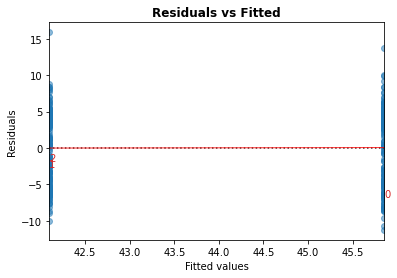

In [16]:
pen_diag = Linear_Reg_Diagnostic(penguins_model)

pen_diag.residual_plot();

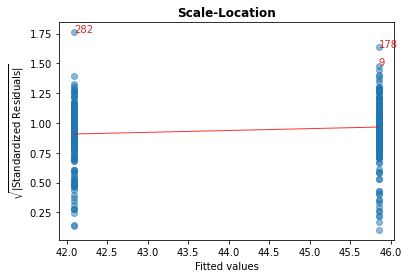

In [17]:
pen_diag.scale_location_plot();

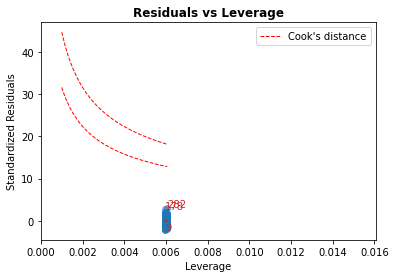

In [18]:
pen_diag.leverage_plot();

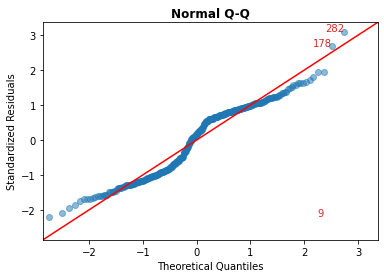

In [19]:
pen_diag.qq_plot();

If your categorical variable has multiple levels (more than 2), we can still turn into dummy variables. For example, if the categorical variable is “side”, and the levels are “left”, “right”, and “center”, you could make two dummy variable columns “left” and “right”. When “side” was “left”, the column “left” will be 1, and the column “right” will be 0. The opposite is true when “side” was “right”. When “side” is “middle”, both the “left” and “right” columns will be 0. 

In [21]:
penguins_model2 = smf.ols(formula = "bill_length_mm ~ species",data=penguins).fit()
penguins_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     410.6
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           2.69e-91
Time:                        13:41:14   Log-Likelihood:                -854.89
No. Observations:                 342   AIC:                             1716.
Df Residuals:                     339   BIC:                             1727.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               38.7914      0.241    161.047      0.000      38.318      39.265
species[T.Chinstrap]    10.0424      0.432     23.232      0.000       9.192      10.893
species[T.Gentoo]        8.7135      0.360     24.237      0.000       8.006       9.421
==============================================================================
Omnibus:                        8.168   Durbin-Watson:                   2.750
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.737
Skew:                           0.288   Prob(JB):                       0.0127
Kurtosis:                       3.530   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple regression
We do not need to restrict ourselves to using a single predictor. We can use any combo of numerical or categorical variables. For instance, if you have two predictor variables, the regression equation becomes: 

$$y = \beta_0+\beta_1x_1+\beta_2x_2$$

$x_1$ is one independent variable, or predictor, and $x_2$ is the other. $\beta_0$ is still the intercept, and it is the predicted value when both $x_1$ and $x_2$ are 0. $\beta_1$ is still a regression coefficient, and it represents the amount we expect $y$ to change when $x_1$ changes one unit. Similarly, $\beta_2$ is the amount we expect $y$ to change when $x_2$ changes one unit. 

We can expand this equation for however many independent variables we want to include:

$$y = \beta_0+\beta_1x_1+\beta_2x_2+ . . .+\beta_nx_n $$

### Adjusted R-squared
When we add new terms to our model, the standard R squared will always go up, no matter whether or not if the new variables are really accounting for variance in y. Adjusted R squared tries to account for this inflation, and may actually lower the R squared if the new variables do not help predict the dependent variable.

In [21]:
model2 = smf.ols(formula='bill_length_mm ~ bill_depth_mm + body_mass_g',data=penguins).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     94.05
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           3.23e-33
Time:                        14:05:18   Log-Likelihood:                -989.80
No. Observations:                 342   AIC:                             1986.
Df Residuals:                     339   BIC:                             1997.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.3105      3.266      7.138      0.000      16.887      29.734
bill_depth_mm     0.1629      0.137      1.192      0.234      -0.106       0.432
body_mass_g       0.0042      0.000     12.608      0.000       0.004       0.005
==============================================================================
Omnibus:                       23.500   Durbin-Watson:                   0.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.525
Skew:                           0.675   Prob(JB):                     1.74e-06
Kurtosis:                       3.203   Cond. No.                     5.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
diag2 = Linear_Reg_Diagnostic(model2)

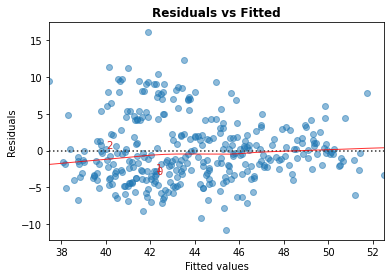

In [24]:
diag2.residual_plot();

### Multicollinearity
When we include multiple terms in our regression, some of these variables may be correlated with each other. This is called multicollinearity and can lead to issues when estimating the values of the regression coefficients and their corresponding p-values. 

To see if there is multicollinearity in your model you can calculate the variance inflation factor for each predictor variable. It lets us know how much larger the variance in the estimation of that predictor is with the other variables included, versus without the other variables. 

A general guideline is that a VIF above 5 or 10 is rather high. You can try re-running your regression model without predictors with high VIFs, and if the R-squared does not change too much, that is a good modification. However, if the R-squared gets drastically smaller, you might consider removing other variables. 

In general, we want models to have high predictive power but to also contain relatively few terms. The more terms a model contains, the less interpretable and understandable it is. The fewer variables needed to explain a phenomenon, the better. However, sometimes, the value you are trying to predict has a complicated relationship with your data, and you may need many predictors to explain it. 


In [19]:
diag2.vif_table()

        Features  VIF Factor
1  bill_depth_mm        1.29
2    body_mass_g        1.29
0      Intercept      189.16


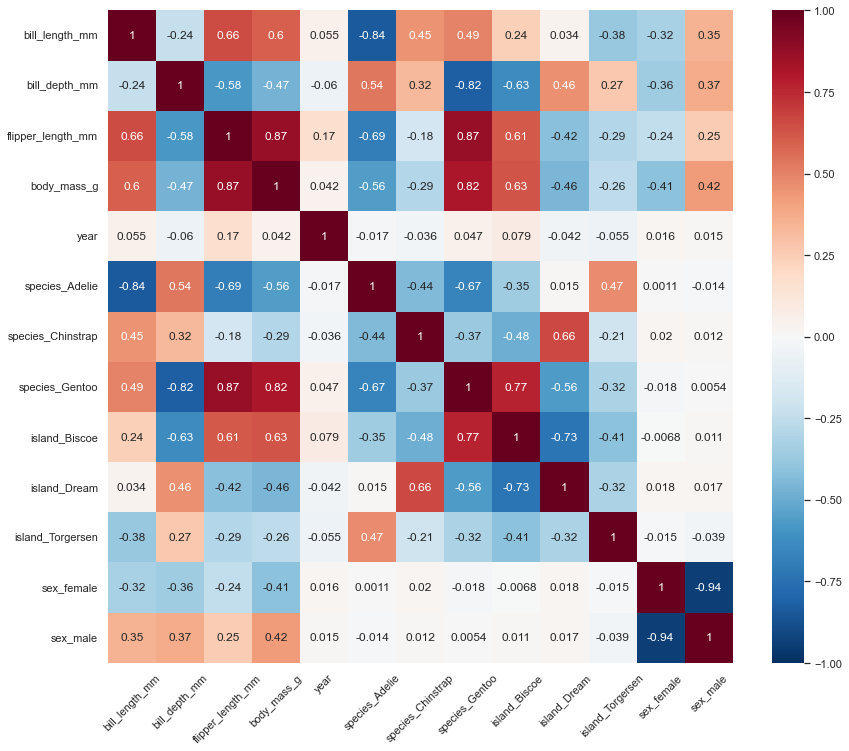

In [20]:
penguin_dummies = pd.get_dummies(penguins)

sns.set(rc={"figure.figsize":(14, 12)})
sns.heatmap(penguin_dummies.corr(),annot=True, cmap = "RdBu_r", vmin=-1, vmax=1)
plt.xticks(rotation=45);


In [55]:
model3 = smf.ols(formula="bill_length_mm ~ sex + island", data=penguins).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     38.09
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           3.75e-21
Time:                        10:44:16   Log-Likelihood:                -988.15
No. Observations:                 333   AIC:                             1984.
Df Residuals:                     329   BIC:                             2000.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              43.3620      0.455     95.260      0.000      42.467      44.257
sex[T.male]             3.7047      0.519      7.141      0.000       2.684       4.725
island[T.Dream]        -1.0075      0.565     -1.782      0.076      -2.119       0.105
island[T.Torgersen]    -6.1367      0.784     -7.831      0.000      -7.678      -4.595
==============================================================================
Omnibus:                       12.800   Durbin-Watson:                   0.499
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.380
Skew:                          -0.187   Prob(JB):                       0.0250
Kurtosis:                       2.374   Cond. No.                         4.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model4 = smf.ols(formula="bill_length_mm ~ species + island + bill_depth_mm + flipper_length_mm + body_mass_g + sex + year", data=penguins).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     188.5
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          7.36e-123
Time:                        10:33:27   Log-Likelihood:                -732.61
No. Observations:                 333   AIC:                             1485.
Df Residuals:                     323   BIC:                             1523.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -389.3322    325.655     -1.196      0.233   -1030.004     251.340
species[T.Chinstrap]     9.9095      0.428     23.167      0.000       9.068      10.751
species[T.Gentoo]        6.4867      1.126      5.759      0.000       4.271       8.703
island[T.Dream]         -0.4624      0.451     -1.025      0.306      -1.350       0.425
island[T.Torgersen]     -0.0733      0.472     -0.155      0.877      -1.001       0.855
sex[T.male]              2.0538      0.390      5.268      0.000       1.287       2.821
bill_depth_mm            0.3272      0.156      2.098      0.037       0.020       0.634
flipper_length_mm        0.0572      0.025      2.263      0.024       0.007       0.107
body_mass_g              0.0011      0.000      2.667      0.008       0.000       0.002
year                     0.2023      0.163      1.243      0.215      -0.118       0.523
==============================================================================
Omnibus:                       35.271   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.036
Skew:                           0.437   Prob(JB):                     9.43e-24
Kurtosis:                       5.623   Cond. No.                     1.27e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
diag4 = Linear_Reg_Diagnostic(model4)
diag4.vif_table()

               Features  VIF Factor
9                  year        1.18
4   island[T.Torgersen]        1.83
1  species[T.Chinstrap]        2.01
5           sex[T.male]        2.57
3       island[T.Dream]        3.21
6         bill_depth_mm        6.37
8           body_mass_g        7.94
7     flipper_length_mm        8.48
2     species[T.Gentoo]       19.73
0             Intercept  7182248.19


### Question
Work in groups. Make the best model you can to predict bill length from the other variables in the data set. Try to not have any variables with a high VIF, but to also have a high R-squared. 

In [ ]:
### your code here